## Notes
On collier machine this uses anaconda geospatial env (source activate geospatial)
Does NOT currently work with pipenv because of failing geospatial libraries

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import sys

In [2]:
buncombe_tract_geo = gpd.read_file('./shape_file_dir/buncombe_bg.shp')
buncombe_tract_geo.index = buncombe_tract_geo['GEOID']
buncombe_tract_geo = buncombe_tract_geo.drop(['AFFGEOID', 'ALAND', 'AWATER', 'COUNTYFP', 'LSAD', 'STATEFP', 'TRACTCE'], axis=1)
# buncombe_tract_geo.head()

In [4]:
buncombebg = pd.read_csv('uemp_nohs.csv')
buncombebg.columns = [['fips_id', 'percent_unemployed', 'percent_nohs']]
# buncombebg.head()

In [5]:
buncombebg['GEOID'] = buncombebg.fips_id.astype(str)
buncombebg['GEOID'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
buncombebg['GEOID'].astype(str)
buncombebg['GEOID'] = buncombebg['GEOID'].str[-12:]
buncombebg.index = pd.to_numeric(buncombebg['GEOID'])
# buncombebg.head()

In [6]:
joined_gpd = buncombe_tract_geo.merge(buncombebg)
# joined_gpd['centroid_column'] = joined_gpd.centroid
# joined_gpd.head()

Text(0.5,1,'Buncombe County, NC - Unemployment by Census Block Group')

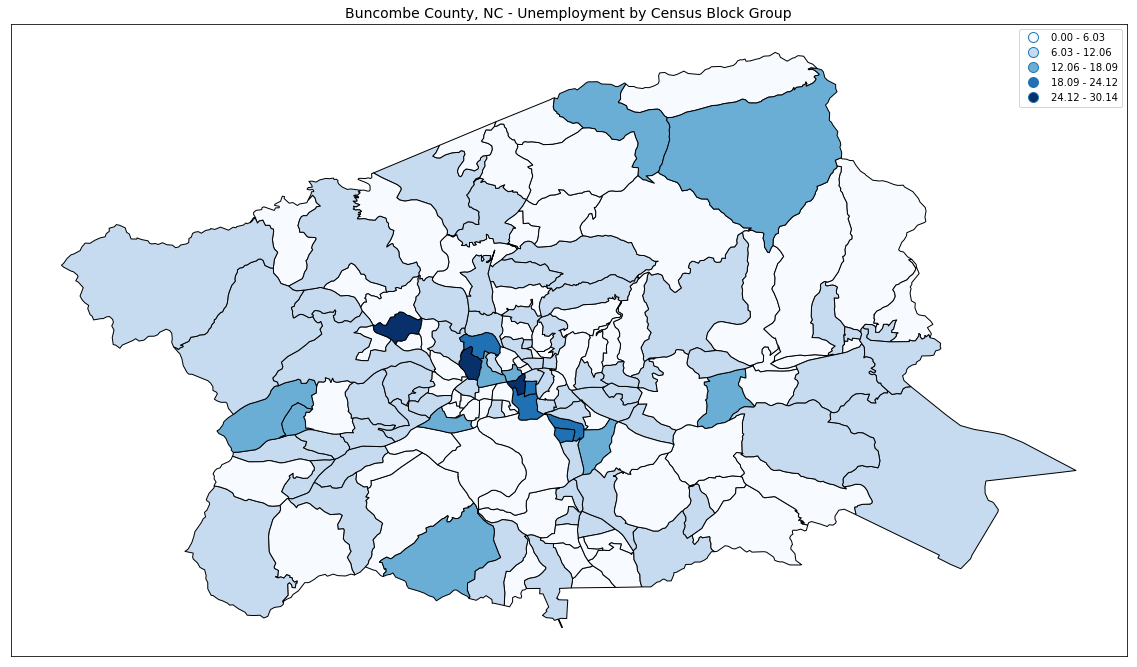

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set(aspect='equal', xticks=[], yticks=[])
joined_gpd.plot(column= 'percent_unemployed', ax = ax, 
              cmap='Blues', edgecolor='black', scheme='equal_interval', legend=True)
plt.title('Buncombe County, NC - Unemployment by Census Block Group', size = 14)

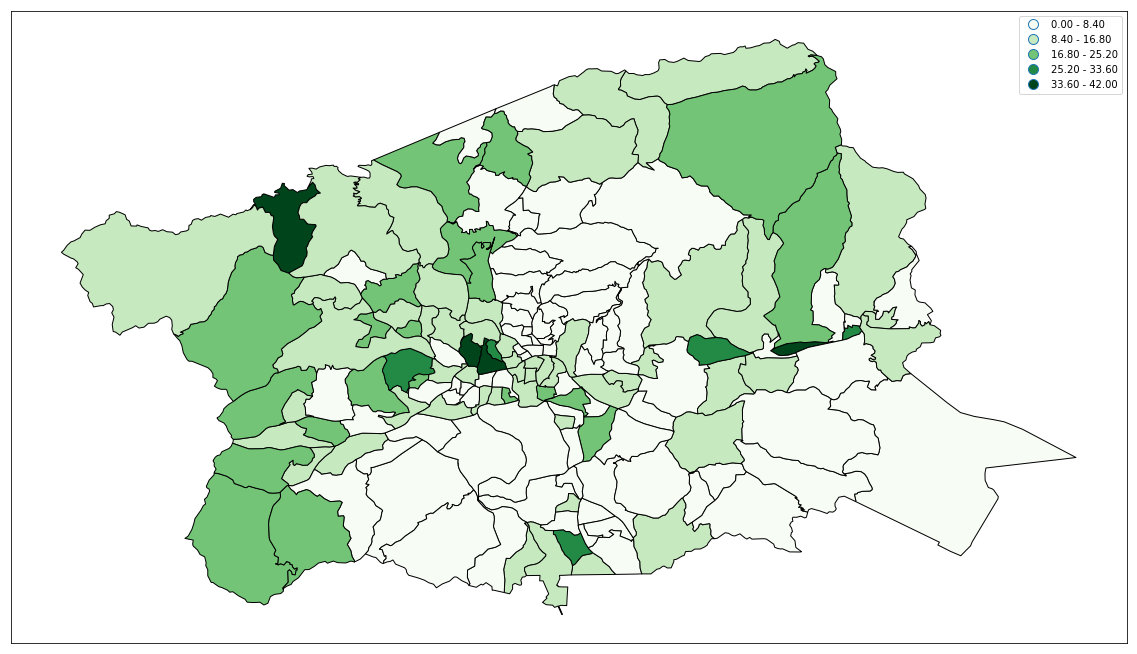

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set(aspect='equal', xticks=[], yticks=[])
joined_gpd.plot(column= 'percent_nohs', ax = ax, 
              cmap='Greens', edgecolor='black', scheme='equal_interval', legend=True)